In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Cargar las imagenes.
imagenes = []
for i in range(1,4):
    im = Image.open('imagen'+ str(i) +'.png').convert('L')
    pic = np.array(im)
    imagenes.append(pic)
    im.close()

In [3]:
#Necesito saber las dimensiones de las imagenes
for i in imagenes:
    print(i.shape)

(171, 239)
(174, 212)
(176, 200)


In [4]:
#Como tiene dimensiones diferentes, las corto para tener dimensiones iguales. Aun asi, quiero ver si no se daño la imagen.
#Hago un plot
listaImagenes = []
for i in imagenes:
    listaImagenes.append(i[0:171, 0:200])
    print(i[0:171, 0:200].shape)

(171, 200)
(171, 200)
(171, 200)


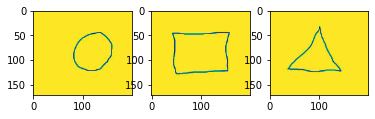

In [5]:
# Las imagenes siguen igual. A pesar de que se cortaron algunos pixeles.
plt.figure(1)
numeroPlot = 131
for imagen in listaImagenes:
    plt.subplot(numeroPlot)
    plt.imshow(imagen)
    numeroPlot += 1
plt.show()

In [6]:
X = np.array(listaImagenes)
print('Shape:', X.shape)
X = X.reshape( len(X), -1 )
print('Reshape de X:', X.shape)
scaler = MinMaxScaler (feature_range= (-1,1))
scaler.fit(X)
X_paraEntrenar = scaler.transform(X)
y = np.array([-1, 0, 1])
print('Shape de Y:', y.shape)
diccionario = {-1: 'Circulo', 0:'Rectangulo', 1: 'Triangulo'}

Shape: (3, 171, 200)
Reshape de X: (3, 34200)
Shape de Y: (3,)


In [7]:
hidden_layers = [(128, 64, 32, 16), (128, 64, 32), (128, 64), (128)]
for capas in hidden_layers:
    modelo = MLPClassifier(random_state = 999, activation = 'tanh', early_stopping = True, hidden_layer_sizes = capas)
    modelo.fit(X_paraEntrenar,y)
    print('Capas: ', capas)
    print(modelo.predict(X_paraEntrenar))

Capas:  (128, 64, 32, 16)
[0 0 0]
Capas:  (128, 64, 32)
[1 1 1]
Capas:  (128, 64)
[0 0 0]
Capas:  128
[1 1 1]


# IMPORTANTE: EL SET DE DATOS ES MUY PEQUEÑO PARA ENTRENAR UNA RED NEURONAL QUE PUEDA IDENTIFICAR ESOS PATRONES. NO HAY IMAGENES PARA VALIDAR EL MODELO, ENTONCES TOCA PROBAR CON LAS MISMAS DE ENTRENAMIENTO. AÚN ASÍ AL MODELO LE FALTA POR MEJORAR. SIN EMBARGO, LA UNICA MANERA ES TENER MAS IMAGENES.